## Final Project Submission

Please fill out:
* Student name: Hiten Patel 
* Student pace: full time
* Scheduled project review date/time: September 14th: 11AM
* Instructor name: James Irving 
* Blog post URL:
https://hpatel530.github.io/blog_number_3_by_hiten_patel


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Introduction 

# OBTAIN
>**Importing libraies/packages**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

/Users/Hiten.K.Patel/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


>**Importing and previewing data**

In [3]:
#Import and previewing data 
df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', None)
print (df.shape)
df.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#df.hist(bins='auto')


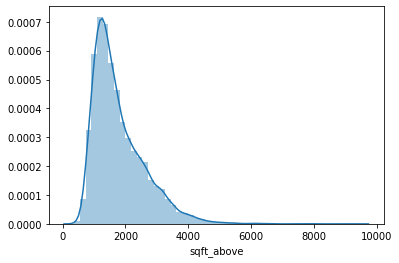

In [5]:
sns.distplot(df['sqft_above'])

In [6]:
#Inspect data for duplicates
duplicates = df[df.duplicated()]
print(len(duplicates))

0


# SCRUB


## Inspecting the Columns 

In [7]:
#dropped the 'id' column from the dataset
df.drop('id', axis=1, inplace=True)

#Confirm changes to dataset
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

>**Inspecting the Column's Data Type**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

>**Inspecting Column's Unique Values**

In [9]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64


floors 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, d

>**Checking for Null Values** 

In [10]:
nulls = df.isna().sum()
null_percent = nulls[nulls>0] / len(df)
null_percent.to_frame('% Null').style.background_gradient(cmap='Reds')

,% Null
waterfront,0.110015
view,0.002917
yr_renovated,0.177895


>**Replace Null Values in 'waterfront, 'view' and 'yr_renovated'**

In [11]:
#Inspecting 'waterfront' column and replacing Null values with the median value 
print(df['waterfront'].nunique())
print(df['waterfront'].unique())
print(df['waterfront'].value_counts())

df['waterfront'] = df['waterfront'].fillna(df['waterfront'].median())

2
[nan  0.  1.]
0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [12]:
#Inspecting 'views' column and replacing Null values with the median value 
print(df['view'].nunique())
print(df['view'].unique())
print(df['view'].value_counts())

df['view'] = df['view'].fillna(df['view'].median())

5
[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [13]:
#Inspecting 'yr_renovated' column and replacing Null values with the median value 
print(df['yr_renovated'].nunique())
print(df['yr_renovated'].unique())
print(df['yr_renovated'].value_counts())

df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_renovated'].median())

70
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [14]:
#Confirm Changes to dataset
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

>**Replacing '?' in 'sqft_basement'**

In [15]:
df.sqft_basement = df.sqft_basement.map(lambda x: x.replace('?', "0"))


In [16]:
#Confirm changes 
print(df['sqft_basement'].value_counts())

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
2390.0        1
207.0         1
792.0         1
506.0         1
1281.0        1
Name: sqft_basement, Length: 304, dtype: int64


**Converting data types to respective columns and then completing a final check**

## Visually Examining Features vs Price

In [17]:
def joint_plots(df, col, target='price'):
    plots = sns.jointplot(data=df, x=col, y=target, kind='reg')
    plt.suptitle(f'{col} vs {target}')
    return plots

In [18]:
# num_cols = list(df.select_dtypes('number').columns)
# for col in num_cols: 
#     joint_plots(df, col)

>* bedrooms has a linear relationship, and vertical stacking - categorical data

>* bathrooms has a linear relationship, and vertical stacking - categorical data

>* sqft_living has a linear relationship, contains outliers

>* sqft_lot has a slight linear relationship, skewed right

>* floors slight linear relationship, and vertical stacking - categorical data

>* waterfront slight linear relationship, and vertical stacking - categorical data

>* view slight linear relationship, and vertical stacking - categorical data

>* condition has no linear relationship - vertical stacking - categorical data 

>* grade slight linear relationship, and vertical stacking - categorical data

>* sqft_above has a linear relationship, contains outliers

>* sqft_basement  has a linear relationship, contains outliers 

>* yr_built slight linear relationship - possible categories  

>* yr_renovated slight linear relationship - vertical stacking - categorical data 

>* zipcode no linear relationship, vertical stacking - possible categorical variable 

>* lat very little linear relationship
* long has no linear relationship 

>* sqft_living15 has a linear relationship, contains outliers 

>* sqft_lot15 slight linear relationship, contains outliers

## Converting Datatypes

In [19]:
#Converting datatypes to appropriate date type
#converting categorical data to str/object

df['bedrooms'] = df['bedrooms'].astype('str')
df['bathrooms'] = df['bathrooms'].astype('str')
df['floors'] = df['floors'].astype('str')
df['waterfront'] = df['waterfront'].astype('str')
df['view'] = df['view'].astype('str')

df['yr_renovated'] = df['yr_renovated'].astype('str')

df['condition'] = df['condition'].astype('str')
df['grade'] = df['grade'].astype('str')



# df['lat'] = df['lat'].astype('str')
# df['long'] = df['long'].astype('str')
df['zipcode'] = df['zipcode'].astype('str')

#converting continuous data to int

df['price'] = df['price'].astype('int')

#converting data from object>int, then converting value to a categorical data
df['sqft_basement'] = df['sqft_basement'].astype('float')
df['sqft_basement'] = df['sqft_basement'].astype('int')
df.sqft_basement = df.sqft_basement.map(lambda x: 1 if x > 0 else 0)
df['sqft_basement'] = df['sqft_basement'].astype('str')                                      

In [20]:
#Dropping the following columns because there is no linear relationship 
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)

In [21]:
#confirming changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           21597 non-null  object
 1   price          21597 non-null  int64 
 2   bedrooms       21597 non-null  object
 3   bathrooms      21597 non-null  object
 4   sqft_living    21597 non-null  int64 
 5   sqft_lot       21597 non-null  int64 
 6   floors         21597 non-null  object
 7   waterfront     21597 non-null  object
 8   view           21597 non-null  object
 9   condition      21597 non-null  object
 10  grade          21597 non-null  object
 11  sqft_above     21597 non-null  int64 
 12  sqft_basement  21597 non-null  object
 13  yr_built       21597 non-null  int64 
 14  yr_renovated   21597 non-null  object
 15  zipcode        21597 non-null  object
 16  sqft_living15  21597 non-null  int64 
 17  sqft_lot15     21597 non-null  int64 
dtypes: int64(7), object(11)
me

# Explore Data

In [22]:
df.describe()

,price,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,2080.321850,1.509941e+04,1788.596842,1970.999676,1986.620318,12758.283512
std,3.673681e+05,918.106125,4.141264e+04,827.759761,29.375234,685.230472,27274.441950
min,7.800000e+04,370.000000,5.200000e+02,370.000000,1900.000000,399.000000,651.000000
25%,3.220000e+05,1430.000000,5.040000e+03,1190.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1560.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,1.068500e+04,2210.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,2015.000000,6210.000000,871200.000000


**Observations**

* Contains extreme outliers 
* 50% of the houses were built between 1950-1997

## Visually Inspecting Target Variable -'Prices'

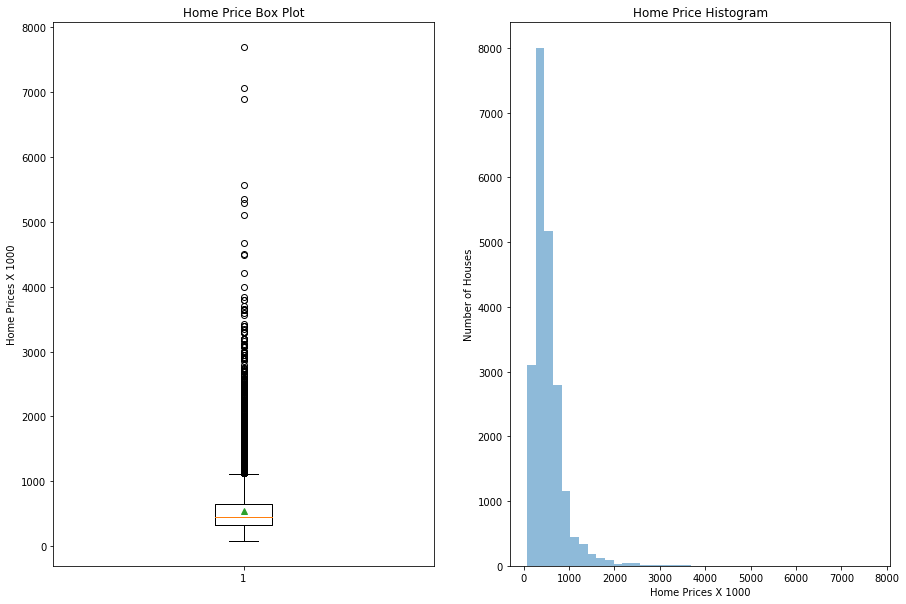

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1.boxplot(df.price/1000, showmeans=True)
ax1.set_ylabel('Home Prices X 1000')
ax1.set_title('Home Price Box Plot')
ax2.hist(df.price/1000, bins=40, alpha=0.5)
ax2.set_ylabel('Number of Houses')
ax2.set_xlabel('Home Prices X 1000')
ax2.set_title('Home Price Histogram')
plt.show()

**Observations**

* Extreme outliers
* Positively skewed right 

## Check for Correlation and Multicollinearity

In [24]:
#Removing target value 'price' and checking correlation
data_pred = df.iloc[:,2:]
data_pred.corr()

,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
sqft_living,1.000000,0.173453,0.876448,0.318152,0.756402,0.184342
sqft_lot,0.173453,1.000000,0.184139,0.052946,0.144763,0.718204
sqft_above,0.876448,0.184139,1.000000,0.424037,0.731767,0.195077
yr_built,0.318152,0.052946,0.424037,1.000000,0.326377,0.070777
sqft_living15,0.756402,0.144763,0.731767,0.326377,1.000000,0.183515
sqft_lot15,0.184342,0.718204,0.195077,0.070777,0.183515,1.000000


In [25]:
#Highlight True Items 
df_corr = data_pred.corr().abs() > .75
df_corr

,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
sqft_living,True,False,True,False,True,False
sqft_lot,False,True,False,False,False,False
sqft_above,True,False,True,False,False,False
yr_built,False,False,False,True,False,False
sqft_living15,True,False,False,False,True,False
sqft_lot15,False,False,False,False,False,True


In [26]:
# # Save absolute value of correlation matrix as a data frame
# # Stack the row:column pairs into a multindex
# # Reset the index to set the multindex to separate columns
# # Sort values. 0 is the column automatically generated by the stacking

# df = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# # Zip the variable name columns in a new column named "pairs"
# df['pairs'] = list(zip(df.level_0, df.level_1))

# # Set index to pairs
# df.set_index(['pairs'], inplace = True)

# #Drop level columns
# df.drop(columns=['level_0', 'level_1'], inplace = True)

# #Rename correlation column as Corr rather than 0
# df.columns = ['corr']

# #Drop duplicates.
# df.drop_duplicates(inplace=True)

# # over .75 and less than 1

# df[(df.corr>.75) & (df.corr<1)]

(7, -0.5)

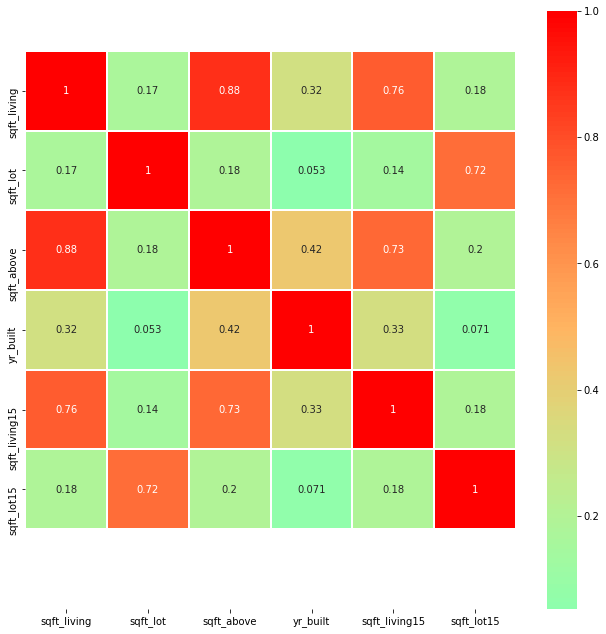

In [27]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(data_pred.corr().abs(), center=0, annot=True, linewidths=1, cmap='rainbow');
ax.set_ylim(len(df.corr())-0, -0.5)

## Log Transformation on Continuous Data 


In [29]:
# #Creating a variable pulling all numeric columns 

# num_cols = df.select_dtypes('number').columns

# #Creating a for loop and applying log transformation to each column 
# for feat in num_cols: 
#     df[feat] = df[feat].map(lambda x: np.log(x))

df['price'] = np.log(df['price'])
    
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,10/13/2014,12.309982,3,1.0,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,1340,5650
1,12/9/2014,13.195614,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1,1951,1991.0,98125,1690,7639
2,2/25/2015,12.100712,2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,2720,8062
3,12/9/2014,13.311329,4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,1,1965,0.0,98136,1360,5000
4,2/18/2015,13.142166,3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,1800,7503


## One-Hot Encoding for Categorical Data

In [30]:
#Create variable that holds categorical data
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_basement', 'yr_renovated',
            'zipcode']

#Perform one-hot encoding on categorical data
dummies = pd.get_dummies(df[cat_cols], prefix=cat_cols, drop_first = True)

#Remove the orginal data from df
df_preprocessed = df.drop(cat_cols, axis=1)

#Concat df_pre with dummies 
df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

#Preview the results 
df_preprocessed.head()


,date,price,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,sqft_basement_1,yr_renovated_1934.0,yr_renovated_1940.0,yr_renovated_1944.0,yr_renovated_1945.0,yr_renovated_1946.0,yr_renovated_1948.0,yr_renovated_1950.0,yr_renovated_1951.0,yr_renovated_1953.0,yr_renovated_1954.0,yr_renovated_1955.0,yr_renovated_1956.0,yr_renovated_1957.0,yr_renovated_1958.0,yr_renovated_1959.0,yr_renovated_1960.0,yr_renovated_1962.0,yr_renovated_1963.0,yr_renovated_1964.0,yr_renovated_1965.0,yr_renovated_1967.0,yr_renovated_1968.0,yr_renovated_1969.0,yr_renovated_1970.0,yr_renovated_1971.0,yr_renovated_1972.0,yr_renovated_1973.0,yr_renovated_1974.0,yr_renovated_1975.0,yr_renovated_1976.0,yr_renovated_1977.0,yr_renovated_1978.0,yr_renovated_1979.0,yr_renovated_1980.0,yr_renovated_1981.0,yr_renovated_1982.0,yr_renovated_1983.0,yr_renovated_1984.0,yr_renovated_1985.0,yr_renovated_1986.0,yr_renovated_1987.0,yr_renovated_1988.0,yr_renovated_1989.0,yr_renovated_1990.0,yr_renovated_1991.0,yr_renovated_1992.0,yr_renovated_1993.0,yr_renovated_1994.0,yr_renovated_1995.0,yr_renovated_1996.0,yr_renovated_1997.0,yr_renovated_1998.0,yr_renovated_1999.0,yr_renovated_2000.0,yr_renovated_2001.0,yr_renovated_2002.0,yr_renovated_2003.0,yr_renovated_2004.0,yr_renovated_2005.0,yr_renovated_2006.0,yr_renovated_2007.0,yr_renovated_2008.0,yr_renovated_2009.0,yr_renovated_2010.0,yr_renovated_2011.0,yr_renovated_2012.0,yr_renovated_2013.0,yr_renovated_2014.0,yr_renovated_2015.0,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,10/13/2014,12.309982,1180,5650,1180,1955,1340,5650,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,12/9/2014,13.195614,2570,7242,2170,1951,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [31]:
df_preprocessed = df_preprocessed.drop('date', axis=1)
df_preprocessed.head()

,price,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,sqft_basement_1,yr_renovated_1934.0,yr_renovated_1940.0,yr_renovated_1944.0,yr_renovated_1945.0,yr_renovated_1946.0,yr_renovated_1948.0,yr_renovated_1950.0,yr_renovated_1951.0,yr_renovated_1953.0,yr_renovated_1954.0,yr_renovated_1955.0,yr_renovated_1956.0,yr_renovated_1957.0,yr_renovated_1958.0,yr_renovated_1959.0,yr_renovated_1960.0,yr_renovated_1962.0,yr_renovated_1963.0,yr_renovated_1964.0,yr_renovated_1965.0,yr_renovated_1967.0,yr_renovated_1968.0,yr_renovated_1969.0,yr_renovated_1970.0,yr_renovated_1971.0,yr_renovated_1972.0,yr_renovated_1973.0,yr_renovated_1974.0,yr_renovated_1975.0,yr_renovated_1976.0,yr_renovated_1977.0,yr_renovated_1978.0,yr_renovated_1979.0,yr_renovated_1980.0,yr_renovated_1981.0,yr_renovated_1982.0,yr_renovated_1983.0,yr_renovated_1984.0,yr_renovated_1985.0,yr_renovated_1986.0,yr_renovated_1987.0,yr_renovated_1988.0,yr_renovated_1989.0,yr_renovated_1990.0,yr_renovated_1991.0,yr_renovated_1992.0,yr_renovated_1993.0,yr_renovated_1994.0,yr_renovated_1995.0,yr_renovated_1996.0,yr_renovated_1997.0,yr_renovated_1998.0,yr_renovated_1999.0,yr_renovated_2000.0,yr_renovated_2001.0,yr_renovated_2002.0,yr_renovated_2003.0,yr_renovated_2004.0,yr_renovated_2005.0,yr_renovated_2006.0,yr_renovated_2007.0,yr_renovated_2008.0,yr_renovated_2009.0,yr_renovated_2010.0,yr_renovated_2011.0,yr_renovated_2012.0,yr_renovated_2013.0,yr_renovated_2014.0,yr_renovated_2015.0,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309982,1180,5650,1180,1955,1340,5650,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,13.195614,2570,7242,2170,1951,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# MODEL

In [32]:
# Create train-test dataset for model validation later
train, test = train_test_split(df_preprocessed, test_size=0.2)

# Check datasets
print(train.shape, test.shape)

(17277, 209) (4320, 209)


In [33]:
outcome = 'price'
train.columns = [col.replace('.', '_') for col in train.columns]
x_cols = list(train.columns)
x_cols.remove(outcome)
x_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'yr_built',
 'sqft_living15',
 'sqft_lot15',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_33',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_25',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_0',
 'bathrooms_4_25',
 'bathrooms_4_5',
 'bathrooms_4_75',
 'bathrooms_5_0',
 'bathrooms_5_25',
 'bathrooms_5_5',
 'bathrooms_5_75',
 'bathrooms_6_0',
 'bathrooms_6_25',
 'bathrooms_6_5',
 'bathrooms_6_75',
 'bathrooms_7_5',
 'bathrooms_7_75',
 'bathrooms_8_0',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1_0',
 'view_1_0',
 'view_2_0',
 'view_3_0',
 'view_4_0',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     634.9
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:10:09   Log-Likelihood:                 5071.3
No. Observations:               17277   AIC:                            -9735.
Df Residuals:                   17073   BIC:                            -8152.
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.7886      0.204     62.781      0.000      12.389      13.188
sqft_living             0.0001   6.27e-06     17.382      0.000    9.66e-05       0.000
sqft_lot             7.007e-07   5.15e-08     13.605      0.000       6e-07    8.02e-07
sqft_above              0.0001   6.92e-06     16.084      0.000    9.77e-05       0.000
yr_built               -0.0006   8.91e-05     -6.655      0.000      -0.001      -0.000
sqft_living15        7.547e-05   3.76e-06     20.094      0.000    6.81e-05    8.28e-05
sqft_lot15           4.326e-08   7.74e-08      0.559      0.576   -1.08e-07    1.95e-07
bedrooms_10            -0.1794      0.108     -1.660      0.097      -0.391       0.032
bedrooms_11             0.0588      0.190      0.310      0.756      -0.313       0.431
bedrooms_2              0.0278      0.016      1.764      0.078      -0.003       0.059
bedrooms_3              0.0404      0.016      2.552      0.011       0.009       0.071
bedrooms_33           1.64e-13   6.35e-14      2.582      0.010    3.95e-14    2.89e-13
bedrooms_4              0.0415      0.016      2.564      0.010       0.010       0.073
bedrooms_5              0.0167      0.017      0.983      0.325      -0.017       0.050
bedrooms_6              0.0012      0.021      0.058      0.954      -0.039       0.042
bedrooms_7             -0.1093      0.037     -2.955      0.003      -0.182      -0.037
bedrooms_8             -0.0209      0.061     -0.342      0.733      -0.141       0.099
bedrooms_9              0.1213      0.133      0.910      0.363      -0.140       0.383
bathrooms_0_75          0.2094      0.094      2.219      0.027       0.024       0.394
bathrooms_1_0           0.2107      0.091      2.314      0.021       0.032       0.389
bathrooms_1_25          0.0504      0.118      0.429      0.668      -0.180       0.281
bathrooms_1_5           0.2248      0.091      2.464      0.014       0.046       0.404
bathrooms_1_75          0.2612      0.091      2.865      0.004       0.083       0.440
bathrooms_2_0           0.2588      0.091      2.837      0.005       0.080       0.438
bathrooms_2_25          0.2873      0.091      3.149      0.002       0.108       0.466
bathrooms_2_5           0.2994      0.091      3.283      0.001       0.121       0.478
bathrooms_2_75          0.3036      0.091      3.324      0.001       0.125       0.483
bathrooms_3_0           0.3054      0.091      3.339      0.001       0.126       0.485
bathrooms_3_25          0.3150      0.092      3.438      0.001       0.135       0.495
bathrooms_3_5           0.3182      0.092      3.474      0.001       0.139       0.498
bathrooms_3_75          0.3473      0.093      3.745      0.000       0.166       0.529
bathrooms_4_0           0.3136      0.093      3.372      0.001       0.131       0.496
bat

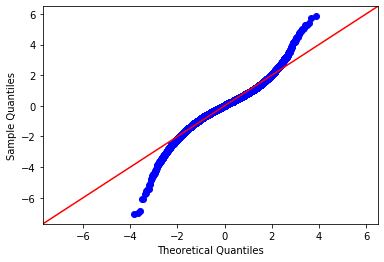

In [34]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
display(model.summary())
fig = sm.graphics.qqplot(model.resid,fit=True, line='45')


In [35]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

209 137
['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'sqft_living15']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,12.7886,0.204,62.781,0.0,12.389,13.188
sqft_living,0.0001,6.27e-06,17.382,0.0,9.66e-05,0.000
sqft_lot,7.007e-07,5.15e-08,13.605,0.0,6e-07,8.02e-07
sqft_above,0.0001,6.92e-06,16.084,0.0,9.77e-05,0.000
yr_built,-0.0006,8.91e-05,-6.655,0.0,-0.001,-0.000


In [36]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     967.0
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:10:26   Log-Likelihood:                 5023.6
No. Observations:               17277   AIC:                            -9779.
Df Residuals:                   17143   BIC:                            -8740.
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.0385      0.176     74.015      0.000      12.693      13.384
sqft_living             0.0001   6.04e-06     17.286      0.000    9.26e-05       0.000
sqft_lot             7.269e-07   3.83e-08     18.994      0.000    6.52e-07    8.02e-07
sqft_above              0.0001   6.79e-06     16.976      0.000       0.000       0.000
yr_built               -0.0006   8.44e-05     -7.690      0.000      -0.001      -0.000
sqft_living15        7.558e-05   3.72e-06     20.300      0.000    6.83e-05    8.29e-05
bedrooms_3              0.0196      0.004      5.085      0.000       0.012       0.027
bedrooms_33           9.15e-14   2.92e-14      3.134      0.002    3.43e-14    1.49e-13
bedrooms_4              0.0220      0.004      5.202      0.000       0.014       0.030
bedrooms_7             -0.1299      0.033     -3.945      0.000      -0.194      -0.065
bathrooms_0_75          0.1528      0.045      3.375      0.001       0.064       0.241
bathrooms_1_0           0.1603      0.038      4.255      0.000       0.086       0.234
bathrooms_1_5           0.1742      0.038      4.623      0.000       0.100       0.248
bathrooms_1_75          0.2104      0.037      5.618      0.000       0.137       0.284
bathrooms_2_0           0.2086      0.038      5.559      0.000       0.135       0.282
bathrooms_2_25          0.2364      0.037      6.319      0.000       0.163       0.310
bathrooms_2_5           0.2482      0.037      6.680      0.000       0.175       0.321
bathrooms_2_75          0.2521      0.037      6.733      0.000       0.179       0.325
bathrooms_3_0           0.2525      0.038      6.714      0.000       0.179       0.326
bathrooms_3_25          0.2629      0.038      6.977      0.000       0.189       0.337
bathrooms_3_5           0.2664      0.037      7.114      0.000       0.193       0.340
bathrooms_3_75          0.2945      0.040      7.385      0.000       0.216       0.373
bathrooms_4_0           0.2591      0.040      6.435      0.000       0.180       0.338
bathrooms_4_25          0.2972      0.043      6.976      0.000       0.214       0.381
bathrooms_4_5           0.2171      0.042      5.194      0.000       0.135       0.299
bathrooms_4_75          0.2758      0.056      4.921      0.000       0.166       0.386
bathrooms_5_0           0.2783      0.058      4.795      0.000       0.165       0.392
bathrooms_5_25          0.2260      0.066      3.425      0.001       0.097       0.355
bathrooms_6_0           0.2192      0.090      2.423      0.015       0.042       0.397
bathrooms_6_5           0.2553      0.134      1.901      0.057      -0.008       0.518
bathrooms_7_75      -1.932e-15   4.36e-16     -4.430      0.000   -2.79e-15   -1.08e-15
bathrooms_8_0          -1.0974      0.191     -5.745      0.000      -1.472      -0.723
flo

In [37]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

138 135
['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'sqft_living15']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,13.0385,0.176,74.015,0.0,12.693,13.384
sqft_living,0.0001,6.04e-06,17.286,0.0,9.26e-05,0.000
sqft_lot,7.269e-07,3.83e-08,18.994,0.0,6.52e-07,8.02e-07
sqft_above,0.0001,6.79e-06,16.976,0.0,0.000,0.000
yr_built,-0.0006,8.44e-05,-7.690,0.0,-0.001,-0.000


In [38]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     974.1
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:10:31   Log-Likelihood:                 5021.8
No. Observations:               17277   AIC:                            -9778.
Df Residuals:                   17144   BIC:                            -8746.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.0553      0.176     74.198      0.000      12.710      13.400
sqft_living             0.0001   6.04e-06     17.311      0.000    9.28e-05       0.000
sqft_lot             7.262e-07   3.83e-08     18.973      0.000    6.51e-07    8.01e-07
sqft_above              0.0001   6.79e-06     17.010      0.000       0.000       0.000
yr_built               -0.0006   8.44e-05     -7.685      0.000      -0.001      -0.000
sqft_living15        7.523e-05   3.72e-06     20.231      0.000    6.79e-05    8.25e-05
bedrooms_3              0.0196      0.004      5.068      0.000       0.012       0.027
bedrooms_33         -1.881e-13   4.51e-14     -4.169      0.000   -2.76e-13   -9.96e-14
bedrooms_4              0.0218      0.004      5.166      0.000       0.014       0.030
bedrooms_7             -0.1319      0.033     -4.007      0.000      -0.196      -0.067
bathrooms_0_75          0.1354      0.044      3.054      0.002       0.049       0.222
bathrooms_1_0           0.1428      0.037      3.909      0.000       0.071       0.214
bathrooms_1_5           0.1566      0.037      4.288      0.000       0.085       0.228
bathrooms_1_75          0.1928      0.036      5.312      0.000       0.122       0.264
bathrooms_2_0           0.1910      0.036      5.252      0.000       0.120       0.262
bathrooms_2_25          0.2187      0.036      6.036      0.000       0.148       0.290
bathrooms_2_5           0.2306      0.036      6.408      0.000       0.160       0.301
bathrooms_2_75          0.2344      0.036      6.463      0.000       0.163       0.305
bathrooms_3_0           0.2347      0.036      6.443      0.000       0.163       0.306
bathrooms_3_25          0.2449      0.036      6.715      0.000       0.173       0.316
bathrooms_3_5           0.2484      0.036      6.856      0.000       0.177       0.319
bathrooms_3_75          0.2765      0.039      7.137      0.000       0.201       0.352
bathrooms_4_0           0.2410      0.039      6.160      0.000       0.164       0.318
bathrooms_4_25          0.2790      0.042      6.720      0.000       0.198       0.360
bathrooms_4_5           0.1989      0.041      4.888      0.000       0.119       0.279
bathrooms_4_75          0.2577      0.055      4.665      0.000       0.149       0.366
bathrooms_5_0           0.2602      0.057      4.543      0.000       0.148       0.372
bathrooms_5_25          0.2071      0.065      3.174      0.002       0.079       0.335
bathrooms_6_0           0.1988      0.090      2.212      0.027       0.023       0.375
bathrooms_7_75      -3.255e-14   6.58e-15     -4.948      0.000   -4.54e-14   -1.97e-14
bathrooms_8_0          -1.1177      0.191     -5.861      0.000      -1.492      -0.744
floors_2_0             -0.0364      0.005     -7.614      0.000      -0.046      -0.027
flo

In [39]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

136 134
['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'sqft_living15']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,13.0553,0.176,74.198,0.0,12.710,13.400
sqft_living,0.0001,6.04e-06,17.311,0.0,9.28e-05,0.000
sqft_lot,7.262e-07,3.83e-08,18.973,0.0,6.51e-07,8.01e-07
sqft_above,0.0001,6.79e-06,17.010,0.0,0.000,0.000
yr_built,-0.0006,8.44e-05,-7.685,0.0,-0.001,-0.000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     974.1
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:10:56   Log-Likelihood:                 5021.8
No. Observations:               17277   AIC:                            -9778.
Df Residuals:                   17144   BIC:                            -8746.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.0553      0.176     74.198      0.000      12.710      13.400
sqft_living             0.0001   6.04e-06     17.311      0.000    9.28e-05       0.000
sqft_lot             7.262e-07   3.83e-08     18.973      0.000    6.51e-07    8.01e-07
sqft_above              0.0001   6.79e-06     17.010      0.000       0.000       0.000
yr_built               -0.0006   8.44e-05     -7.685      0.000      -0.001      -0.000
sqft_living15        7.523e-05   3.72e-06     20.231      0.000    6.79e-05    8.25e-05
bedrooms_3              0.0196      0.004      5.068      0.000       0.012       0.027
bedrooms_33         -1.123e-13   2.59e-14     -4.341      0.000   -1.63e-13   -6.16e-14
bedrooms_4              0.0218      0.004      5.166      0.000       0.014       0.030
bedrooms_7             -0.1319      0.033     -4.007      0.000      -0.196      -0.067
bathrooms_0_75          0.1354      0.044      3.054      0.002       0.049       0.222
bathrooms_1_0           0.1428      0.037      3.909      0.000       0.071       0.214
bathrooms_1_5           0.1566      0.037      4.288      0.000       0.085       0.228
bathrooms_1_75          0.1928      0.036      5.312      0.000       0.122       0.264
bathrooms_2_0           0.1910      0.036      5.252      0.000       0.120       0.262
bathrooms_2_25          0.2187      0.036      6.036      0.000       0.148       0.290
bathrooms_2_5           0.2306      0.036      6.408      0.000       0.160       0.301
bathrooms_2_75          0.2344      0.036      6.463      0.000       0.163       0.305
bathrooms_3_0           0.2347      0.036      6.443      0.000       0.163       0.306
bathrooms_3_25          0.2449      0.036      6.715      0.000       0.173       0.316
bathrooms_3_5           0.2484      0.036      6.856      0.000       0.177       0.319
bathrooms_3_75          0.2765      0.039      7.137      0.000       0.201       0.352
bathrooms_4_0           0.2410      0.039      6.160      0.000       0.164       0.318
bathrooms_4_25          0.2790      0.042      6.720      0.000       0.198       0.360
bathrooms_4_5           0.1989      0.041      4.888      0.000       0.119       0.279
bathrooms_4_75          0.2577      0.055      4.665      0.000       0.149       0.366
bathrooms_5_0           0.2602      0.057      4.543      0.000       0.148       0.372
bathrooms_5_25          0.2071      0.065      3.174      0.002       0.079       0.335
bathrooms_6_0           0.1988      0.090      2.212      0.027       0.023       0.375
bathrooms_7_75      -8.438e-15   1.74e-15     -4.837      0.000   -1.19e-14   -5.02e-15
bathrooms_8_0          -1.1177      0.191     -5.861      0.000      -1.492      -0.744
floors_2_0             -0.0364      0.005     -7.614      0.000      -0.046      -0.027
flo

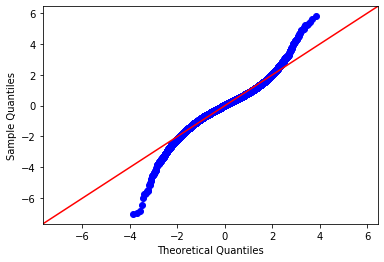

In [40]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
display (model.summary())
fig = sm.graphics.qqplot(model.resid,fit=True, line='45')


In [41]:
model.pvalues

pvalues = model.pvalues.rename('p-values')
pvalues.sort_values(ascending=False)

yr_renovated_1987_0    0.037956
yr_renovated_2007_0    0.030808
yr_renovated_2012_0    0.027000
bathrooms_6_0          0.026959
yr_renovated_1976_0    0.024708
                         ...   
zipcode_98029          0.000000
zipcode_98027          0.000000
zipcode_98008          0.000000
zipcode_98006          0.000000
Intercept              0.000000
Name: p-values, Length: 135, dtype: float64

**Multicollinearity Check**

In [42]:
X = df_preprocessed.drop('price', axis=1)
X = sm.add_constant(X)
print(X.shape)
X
# vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# list(zip(x_cols, vif))

(21597, 209)


,const,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,sqft_basement_1,yr_renovated_1934.0,yr_renovated_1940.0,yr_renovated_1944.0,yr_renovated_1945.0,yr_renovated_1946.0,yr_renovated_1948.0,yr_renovated_1950.0,yr_renovated_1951.0,yr_renovated_1953.0,yr_renovated_1954.0,yr_renovated_1955.0,yr_renovated_1956.0,yr_renovated_1957.0,yr_renovated_1958.0,yr_renovated_1959.0,yr_renovated_1960.0,yr_renovated_1962.0,yr_renovated_1963.0,yr_renovated_1964.0,yr_renovated_1965.0,yr_renovated_1967.0,yr_renovated_1968.0,yr_renovated_1969.0,yr_renovated_1970.0,yr_renovated_1971.0,yr_renovated_1972.0,yr_renovated_1973.0,yr_renovated_1974.0,yr_renovated_1975.0,yr_renovated_1976.0,yr_renovated_1977.0,yr_renovated_1978.0,yr_renovated_1979.0,yr_renovated_1980.0,yr_renovated_1981.0,yr_renovated_1982.0,yr_renovated_1983.0,yr_renovated_1984.0,yr_renovated_1985.0,yr_renovated_1986.0,yr_renovated_1987.0,yr_renovated_1988.0,yr_renovated_1989.0,yr_renovated_1990.0,yr_renovated_1991.0,yr_renovated_1992.0,yr_renovated_1993.0,yr_renovated_1994.0,yr_renovated_1995.0,yr_renovated_1996.0,yr_renovated_1997.0,yr_renovated_1998.0,yr_renovated_1999.0,yr_renovated_2000.0,yr_renovated_2001.0,yr_renovated_2002.0,yr_renovated_2003.0,yr_renovated_2004.0,yr_renovated_2005.0,yr_renovated_2006.0,yr_renovated_2007.0,yr_renovated_2008.0,yr_renovated_2009.0,yr_renovated_2010.0,yr_renovated_2011.0,yr_renovated_2012.0,yr_renovated_2013.0,yr_renovated_2014.0,yr_renovated_2015.0,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.0,1180,5650,1180,1955,1340,5650,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1.0,2570,7242,2170,1951,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('const', 22843.650174410974),
 ('sqft_living', 17.553908228633087),
 ('sqft_lot', 2.1370002190513233),
 ('sqft_above', 17.429994624296107),
 ('yr_built', 3.6077583366292862),
 ('sqft_living15', 3.469054713997446),
 ('sqft_lot15', 2.296091740946436),
 ('bedrooms_10', 1.052467473220132),
 ('bedrooms_11', 1.0835705858556117),
 ('bedrooms_2', 14.516740743971999),
 ('bedrooms_3', 32.542682022217384),
 ('bedrooms_33', 1.0086321164844654),
 ('bedrooms_4', 29.7625086497921),
 ('bedrooms_5', 10.421862598432613),
 ('bedrooms_6', 2.792774514305013),
 ('bedrooms_7', 1.3174923112594374),
 ('bedrooms_8', 1.1272884979573974),
 ('bedrooms_9', 1.2892658146200633),
 ('bathrooms_0.75', 18.87205569177246),
 ('bathrooms_1.0', 795.4048939201466),
 ('bathrooms_1.25', 3.2665662978894594),
 ('bathrooms_1.5', 339.88997463729515),
 ('bathrooms_1.75', 659.1645030932935),
 ('bathrooms_2.0', 442.863105536356),
 ('bathrooms_2.25', 467.15078349948107),
 ('bathrooms_2.5', 1017.4809333892551),
 ('bathrooms_2.75', 282

In [ ]:
#remove vif over threshold of 6

In [ ]:
#refit model, QQ plot ,check for normaility, multicollinearity assumption check,
#homoscedasitcty check 


In [ ]:
#Intrepretation of data; train/test split, 

In [ ]:
#conclusions 